In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.mixture import GaussianMixture
from numpy.random import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [2]:
path = "colors.pkl"

with open(path, 'rb') as file:
    data = pickle.load(file)

In [3]:
X = data
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

X_standardized = (X - means) / stds

In [4]:
n_components = 7

gmm = GaussianMixture(n_components=7, random_state=0)
gmm.fit(X_standardized)

GaussianMixture(n_components=7, random_state=0)

In [5]:
means = gmm.means_
covariances = gmm.covariances_

### 2-D Plot of Gaussians (Means and Covariances)

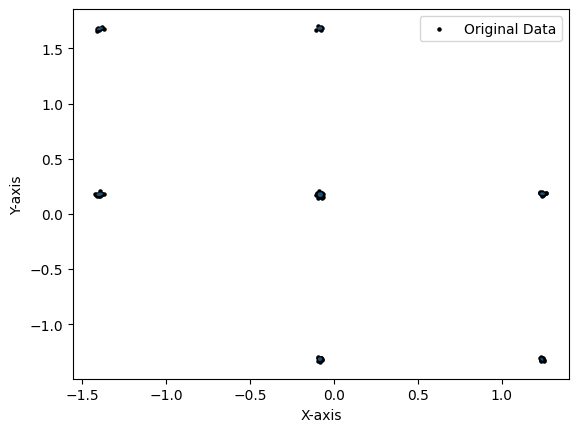

In [6]:
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], s=5, label='Original Data', c='black')

for i in range(n_components):
    eigvalues, eigvectors = np.linalg.eigh(covariances[i])
    order = eigvalues.argsort()[::-1]
    eigvalues, eigvectors = eigvalues[order], eigvectors[:, order]
    angle = np.arctan2(eigvectors[1, 0], eigvectors[0, 0])
    width, height = 2 * np.sqrt(2) * np.sqrt(eigvalues)
    ell = plt.matplotlib.patches.Ellipse(means[i], width, height, angle=np.degrees(angle), alpha=0.7)
    plt.gca().add_patch(ell)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

### 3-D Plot of Gaussians to view the plane of clusters

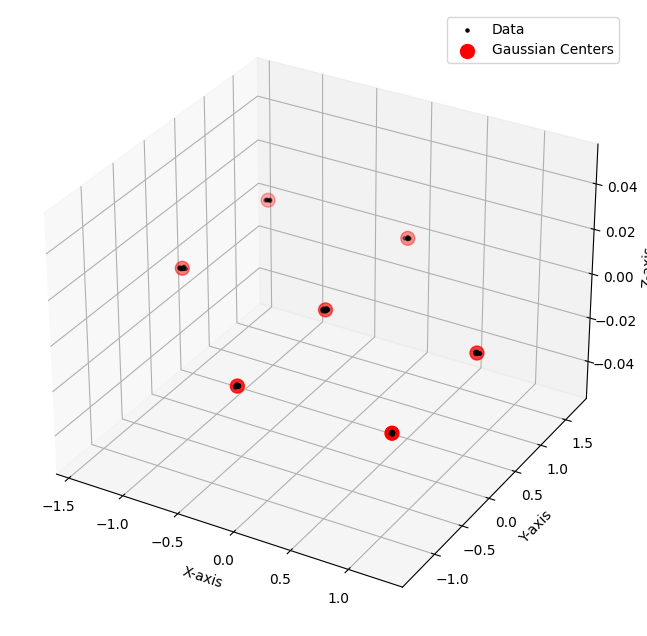

In [10]:
# reference from gpt for 3D plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_standardized[:, 0], X_standardized[:, 1], s=5, label='Data', c='black')

component_centers = gmm.means_
ax.scatter(component_centers[:, 0], component_centers[:, 1], c='red', marker='o', s=100, label='Gaussian Centers')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()
plt.show()

In [13]:
def generate_dataset(number_of_components, means, covariances):
    num_samples = len(means)
    dataset = np.zeros((number_of_components * num_samples, 2))
    for i in range(num_samples):
        spl = multivariate_normal(means[i], covariances[i], number_of_components)
        dataset[i * number_of_components:(i + 1) * number_of_components, :] = spl
    return dataset

In [14]:
sample_dataset = generate_dataset(n_components, means, covariances)

In [15]:
print(sample_dataset)

[[-0.11475974  0.19268425]
 [-0.07923502  0.16805146]
 [-0.07665671  0.16118296]
 [-0.08281266  0.15375665]
 [-0.08690782  0.16545606]
 [-0.07490572  0.16012728]
 [-0.08868829  0.19182787]
 [ 1.22251749 -1.3123688 ]
 [ 1.25119261 -1.31742561]
 [ 1.23618605 -1.31665836]
 [ 1.2355749  -1.3064938 ]
 [ 1.23652578 -1.31822101]
 [ 1.22870633 -1.32663323]
 [ 1.23977364 -1.29858621]
 [-1.40051288  1.67936697]
 [-1.38279415  1.66082661]
 [-1.37685252  1.67850377]
 [-1.3740107   1.687536  ]
 [-1.41158648  1.66661125]
 [-1.40608241  1.66473349]
 [-1.38906789  1.669323  ]
 [-1.38555286  0.18026177]
 [-1.3834868   0.20521362]
 [-1.40417602  0.18112164]
 [-1.3642522   0.17710589]
 [-1.40387393  0.16362757]
 [-1.3961143   0.19652437]
 [-1.39170024  0.17947953]
 [ 1.23157207  0.18051862]
 [ 1.23599502  0.17675762]
 [ 1.24353333  0.19864795]
 [ 1.25344431  0.18682312]
 [ 1.22980372  0.18135675]
 [ 1.2383482   0.17922877]
 [ 1.23340112  0.19292472]
 [-0.0740346  -1.31463199]
 [-0.08541994 -1.31876124]
 